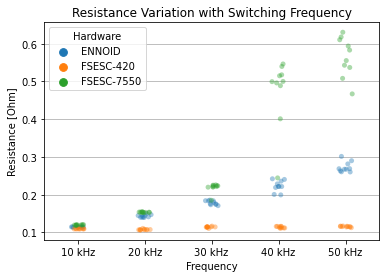

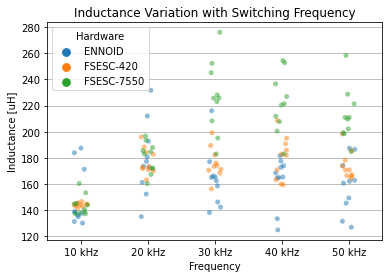

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import ast

# data is stored as python dictionary with frequency label as strings and raw output from VESC tool

data_directories = ['ENNOID-FRF/RL-detection/',
                    'FSESC-420-FRF/RL-detection/',
                    'FSESC-7550-FRF/RL-detection/']

R = []
L = []
LqLd = []

for data_directory in data_directories:
    
    file = open(data_directory + 'detection_data.txt', 'r')
    RL_output = ast.literal_eval(file.read())
    
    hardware = data_directory[:data_directory.find('-FRF/')]
    for frequency in RL_output.keys():
        for line in RL_output[frequency].split('\n'):
            if line.find('Resistance') != -1:
                resistance = float(line[line.find(':') + 2:
                                        line.find('ohm') - 1]) 
                R.append((frequency, resistance, hardware))
            if line.find('Inductance') != -1:
                inductance = float(line[line.find(':') + 2:
                                        line.find('uH') - 1])
                L.append((frequency, inductance, hardware))
                LqLd.append(float(line[line.find('Ld:') + 4:
                                       line.find('uH)') - 1]))

#sns.set()
data = pd.DataFrame(R, columns=['Frequency','Resistance [Ohm]', 'Hardware'])
ax = sns.stripplot(data=data, 
                   x='Frequency', y='Resistance [Ohm]', hue='Hardware', 
                   dodge=False, alpha=0.4)
ax.set_title('Resistance Variation with Switching Frequency')
ax.grid(axis='y')
plt.show()

data = pd.DataFrame(L, columns=['Frequency','Inductance [uH]', 'Hardware'])
ax = sns.stripplot(data=data, 
                   x='Frequency', y='Inductance [uH]', hue='Hardware', 
                   dodge=False, alpha=0.5)
ax.set_title('Inductance Variation with Switching Frequency')
ax.grid(axis='y')
plt.show()